https://lms.mipt.ru/mod/quiz/view.php?id=172655

## 1 задание

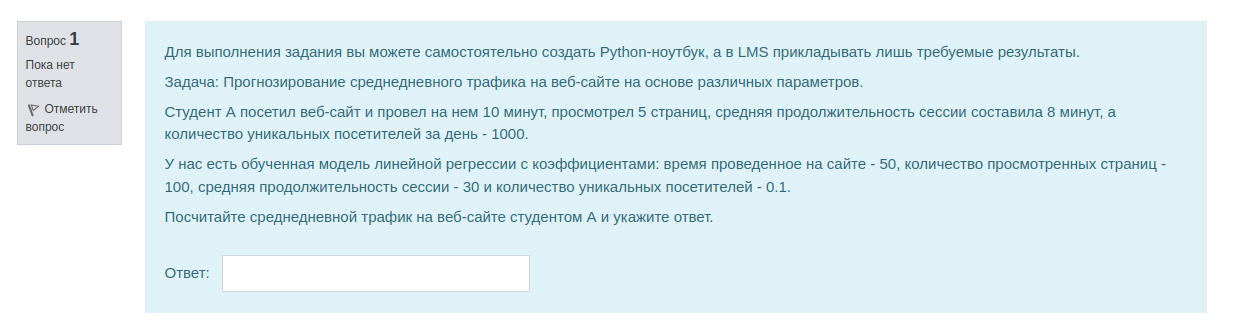

In [ ]:
10 * 50 + 5 * 100 + 8 * 30 + 1000 * 0.1

1340.0

## 2 задание

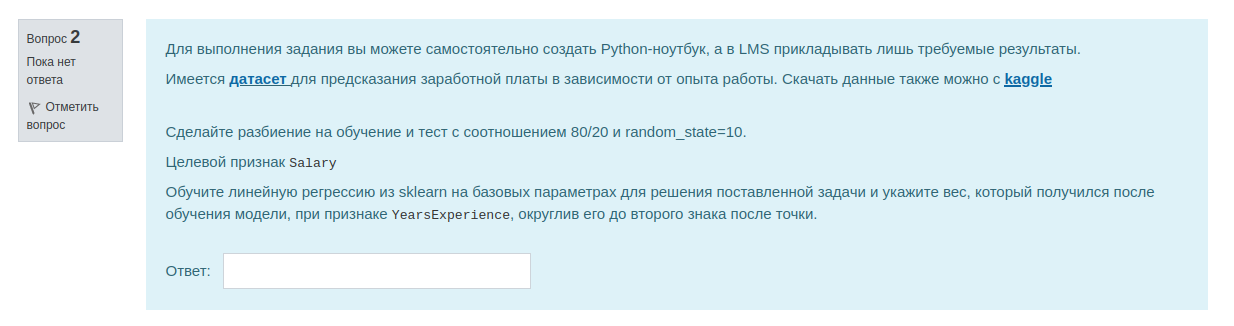

In [ ]:
!wget 'https://drive.google.com/uc?id=19eu93yLo3WJwMWvhyfNLnLDlY8Fhi44t' -O salary.csv

--2024-09-16 16:27:56--  https://drive.google.com/uc?id=19eu93yLo3WJwMWvhyfNLnLDlY8Fhi44t
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.113, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19eu93yLo3WJwMWvhyfNLnLDlY8Fhi44t [following]
--2024-09-16 16:27:56--  https://drive.usercontent.google.com/download?id=19eu93yLo3WJwMWvhyfNLnLDlY8Fhi44t
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 664 [application/octet-stream]
Saving to: ‘salary.csv’

salary.csv          100%[===================>]     664  --.-KB/s    in 0s      

2024-09-16 16:27:59 (11.5 MB/s) - ‘salary.cs

In [ ]:
import pandas as pd

df = pd.read_csv('salary.csv')

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
from sklearn.model_selection import train_test_split

target = 'Salary'

X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']],
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=10)

X_train.shape, X_test.shape

((24, 1), (6, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print(round(lr.coef_[0], 2))

9356.86


## 3 задание

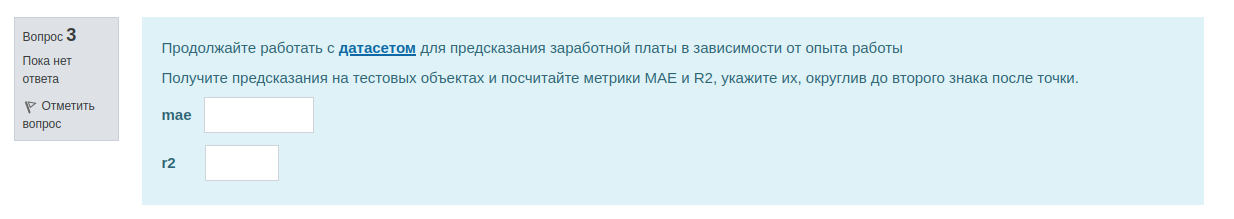

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('mae', round(mae, 2), '\nr2', round(r2, 2))

mae 2741.28 
r2 0.98


## 4 задание

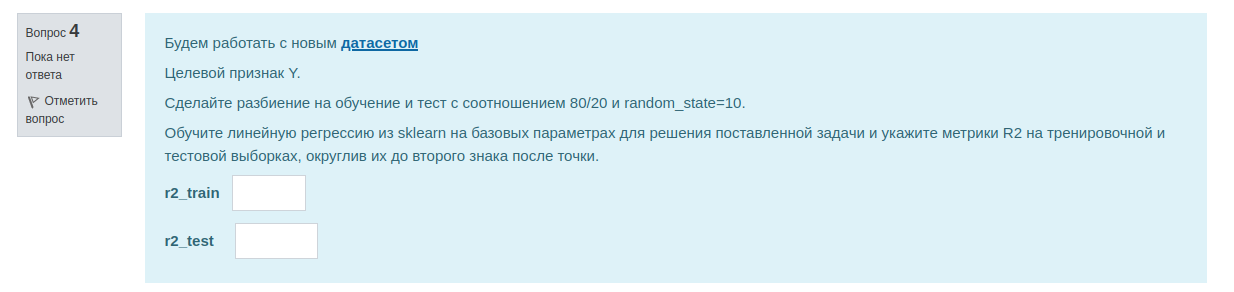

In [ ]:
!wget 'https://drive.google.com/uc?id=1sDFZyU2AsY9i3Sy1O3nWAYhcLvBCUv3n' -O poly.csv

--2024-09-16 16:28:55--  https://drive.google.com/uc?id=1sDFZyU2AsY9i3Sy1O3nWAYhcLvBCUv3n
Resolving drive.google.com (drive.google.com)... 172.217.203.101, 172.217.203.113, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1sDFZyU2AsY9i3Sy1O3nWAYhcLvBCUv3n [following]
--2024-09-16 16:28:55--  https://drive.usercontent.google.com/download?id=1sDFZyU2AsY9i3Sy1O3nWAYhcLvBCUv3n
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 768 [application/octet-stream]
Saving to: ‘poly.csv’

poly.csv            100%[===================>]     768  --.-KB/s    in 0s      

2024-09-16 16:28:57 (31.0 MB/s) - ‘poly.csv’ s

In [ ]:
df = pd.read_csv('poly.csv')

In [ ]:
from sklearn.model_selection import train_test_split

target = 'Y'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=10)

X_train.shape, X_test.shape

((16, 1), (4, 1))

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)
print('r2_train', round(r2_train, 2))
print('r2_test', round(r2_test, 2))

r2_train 0.67
r2_test -5.66


## 5 задание

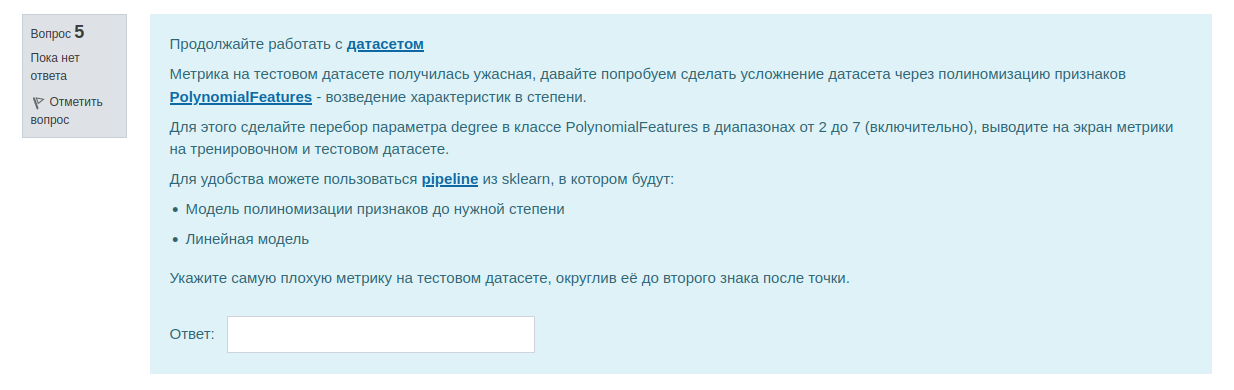

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


for degree in range(2, 8):
    pipe_poly = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    ).fit(X_train, y_train)


    print('degree', degree)
    r2_train = pipe_poly.score(X_train, y_train)
    r2_test = pipe_poly.score(X_test, y_test)
    print('r2_train', round(r2_train, 2))
    print('r2_test', round(r2_test, 2))

degree 2
r2_train 0.88
r2_test -3.24
degree 3
r2_train 0.98
r2_test 0.84
degree 4
r2_train 0.98
r2_test 0.94
degree 5
r2_train 0.98
r2_test 0.9
degree 6
r2_train 0.98
r2_test -0.74
degree 7
r2_train 0.98
r2_test -1.29


In [ ]:
-3.24

-3.24

## 6 задание

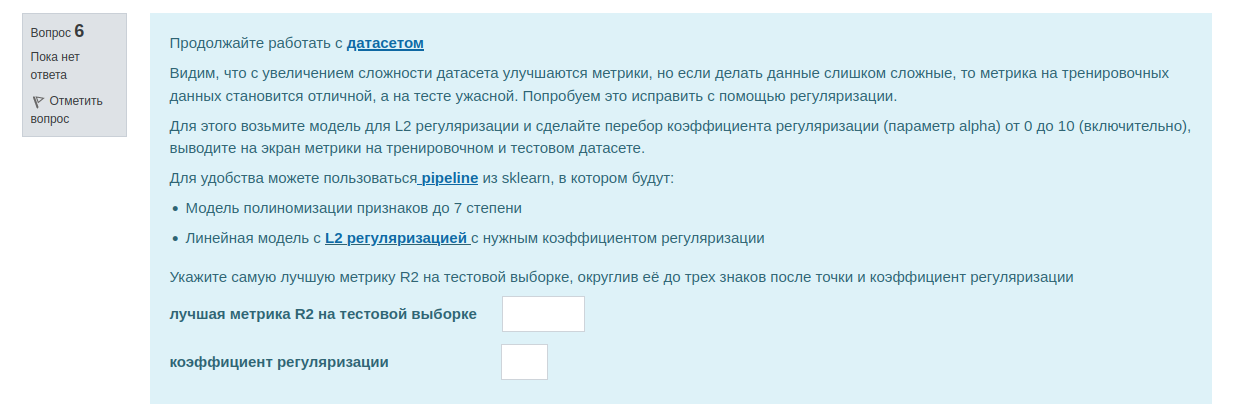


In [ ]:
from sklearn.linear_model import Ridge

best_r2 = 0
best_alpha = -1

for alpha in range(0, 11):
    pipe_poly_reg = make_pipeline(
        PolynomialFeatures(degree=7),
        Ridge(alpha=alpha)
    ).fit(X_train, y_train)

    print('alpha', alpha)
    r2_train = pipe_poly_reg.score(X_train, y_train)
    r2_test = pipe_poly_reg.score(X_test, y_test)
    print('r2_train', round(r2_train, 2))
    print('r2_test', round(r2_test, 2))

    if best_r2 < r2_test:
        best_r2 = r2_test
        best_alpha = alpha

alpha 0
r2_train 0.98
r2_test -1.29
alpha 1
r2_train 0.98
r2_test 0.62
alpha 2
r2_train 0.98
r2_test 0.9
alpha 3
r2_train 0.98
r2_test 0.81
alpha 4
r2_train 0.98
r2_test 0.62
alpha 5
r2_train 0.98
r2_test 0.43
alpha 6
r2_train 0.98
r2_test 0.26
alpha 7
r2_train 0.98
r2_test 0.12
alpha 8
r2_train 0.98
r2_test 0.01
alpha 9
r2_train 0.98
r2_test -0.08
alpha 10
r2_train 0.98
r2_test -0.16


In [ ]:
round(best_r2, 3), best_alpha

(0.902, 2)

## 7 задание

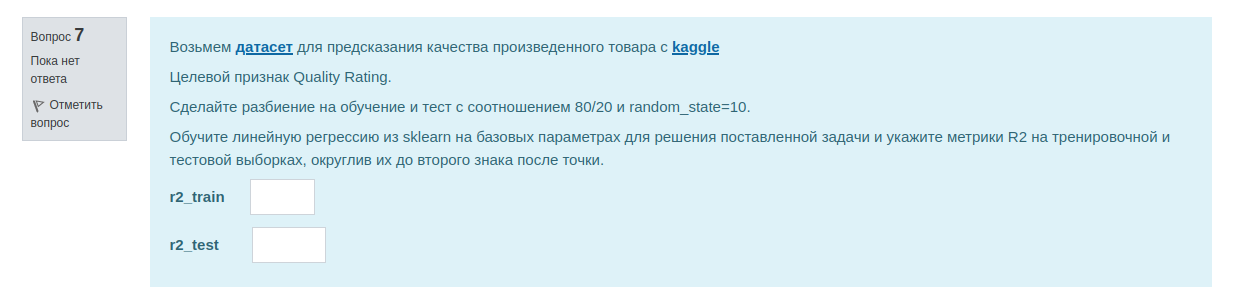

In [ ]:
!wget 'https://drive.google.com/uc?id=1PsLKuShAcEAYbZWumaIcHUmPQKUgFW5z' -O manufacturing.csv

--2024-09-16 16:29:58--  https://drive.google.com/uc?id=1PsLKuShAcEAYbZWumaIcHUmPQKUgFW5z
Resolving drive.google.com (drive.google.com)... 172.217.203.102, 172.217.203.139, 172.217.203.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PsLKuShAcEAYbZWumaIcHUmPQKUgFW5z [following]
--2024-09-16 16:29:58--  https://drive.usercontent.google.com/download?id=1PsLKuShAcEAYbZWumaIcHUmPQKUgFW5z
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430082 (420K) [application/octet-stream]
Saving to: ‘manufacturing.csv’

manufacturing.csv   100%[===================>] 420.00K  --.-KB/s    in 0.01s   

2024-09-16 16:30:01 (28.3 M

In [ ]:
df = pd.read_csv('manufacturing.csv')
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [ ]:
from sklearn.model_selection import train_test_split

target = 'Quality Rating'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=10)

X_train.shape, X_test.shape

((3165, 5), (792, 5))

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)
print('r2_train', round(r2_train, 2))
print('r2_test', round(r2_test, 2))

r2_train 0.5
r2_test 0.53


## 8 задание

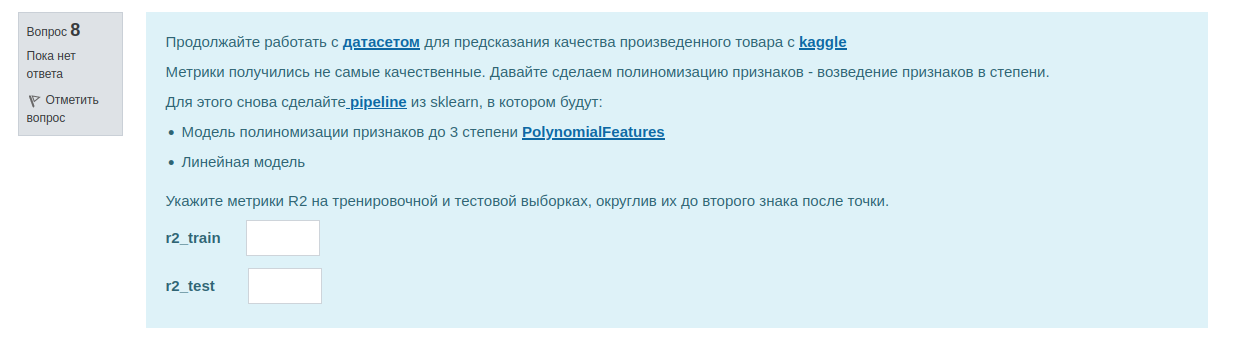

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


pipe_poly = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

pipe_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [ ]:
r2_train = pipe_poly.score(X_train, y_train)
r2_test = pipe_poly.score(X_test, y_test)
print('r2_train', round(r2_train, 2))
print('r2_test', round(r2_test, 2))

r2_train 0.98
r2_test 0.98
